**House Price Prediction Using Linear Regression .**

**1.Libraries**

In [40]:
#importing libraries
import pandas as pd
import seaborn as sns


**1.1 Dataset:Housing.Csv**

In [7]:
#importing dataset
df=pd.read_csv("/content/Housing.csv")

**Exploratory Data Analysis(EDA):**

In [8]:
df.head()# to view top 5 records of a dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
df.tail()# to view last 5 records of a dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [16]:
df.head()#after converting the  data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [19]:
df.info()#to print the info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [20]:
df.describe()#to print the description about dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.089908
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


**Data Pre-processing:**

In [41]:
#converting categorical data into 0 and 1 using simple replace meathod
df['mainroad'].replace(['yes','no'],[1,0],inplace=True)
df['guestroom'].replace(['yes','no'],[1,0],inplace=True)
df['basement'].replace(['yes','no'],[1,0],inplace=True)
df['hotwaterheating'].replace(['yes','no'],[1,0],inplace=True)
df['airconditioning'].replace(['yes','no'],[1,0],inplace=True)
df['prefarea'].replace(['yes','no'],[1,0],inplace=True)
df['furnishingstatus'].replace(['furnished','unfurnished','semi-furnished'],[1,0,2],inplace=True)


**Feature Engineeing**

In [21]:
#defining target and independent variable
X=df.drop(['price'],axis=1)
Y=df['price']

**Model trainig and testing**

In [23]:

#model importing from sklearn library
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [25]:
#model_Training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [27]:
#fitting the training data  into the model
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
#predicting for test samples

y_pred=lr.predict(x_test)

**Regression plot using Seaborn inbuilt function regplot()**

<Axes: xlabel='area', ylabel='price'>

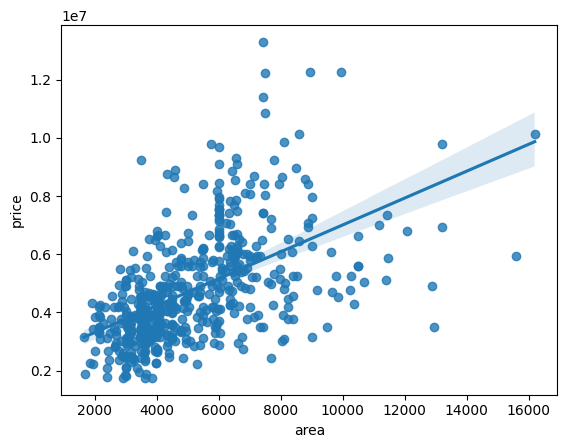

In [39]:
sns.regplot(x=df['area'],y=df['price'],data=df)

**Model Evaluation:**

In [37]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rsq = r2_score(y_test,y_pred)
print("The Mean_Squared_Error-->",mse,"\nR-Square Score--> ",rsq)

The Mean_Squared_Error--> 1358977466720.0122 
R-Square Score-->  0.6511203221798871
